In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(clinical_df, mouse_df, how = "left", on = 'Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df = combined_df.groupby(['Drug', 'Timepoint'])
mean_tumor_volume = grouped_df['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_volume_df = mean_tumor_volume.reset_index()

# Preview DataFrame
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
StdError_Tumor_Volume = combined_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']
# Convert to DataFrame
StdError_Tumor_Volume = pd.DataFrame(StdError_Tumor_Volume)
# Preview DataFrame
StdError_Tumor_df = StdError_Tumor_Volume.reset_index()
StdError_Tumor_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_df = mean_tumor_volume_df.pivot(index = 'Timepoint', columns = 'Drug')['Tumor Volume (mm3)']
StdError_Tumor_df = StdError_Tumor_df.pivot(index = 'Timepoint', columns = 'Drug')['Tumor Volume (mm3)']
# Preview that Reformatting worked
mean_tumor_volume_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [19]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (0,5))
plt.errorbar(mean_tumor_volume_df.index, mean_tumor_volume_df['Capomulin'], yerr = StdError_Tumor_df['Capomulin'], 
             marker = "o", color = "r", markersize = 5, linestyle = "dashed", linewidth = 0.50, capsize = 3)
plt.errorbar(mean_tumor_volume_df.index, mean_tumor_volume_df['Infubinol'], yerr = StdError_Tumor_df['Infubinol'], 
             marker = "^", color = "b", markersize = 5, linestyle = "dashed", linewidth = 0.50, capsize = 3)
plt.errorbar(mean_tumor_volume_df.index, mean_tumor_volume_df['Ketapril'], yerr = StdError_Tumor_df['Ketapril'], 
             marker = "s", color = "g", markersize = 5, linestyle = "dashed", linewidth = 0.50, capsize = 3)
plt.errorbar(mean_tumor_volume_df.index, mean_tumor_volume_df['Placebo'], yerr = StdError_Tumor_df['Placebo'], 
             marker = "d", color = "k", markersize = 5, linestyle = "dashed", linewidth = 0.50, capsize = 3)

plt.ylim (20, 80)
plt.xlim (0, 45)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(linestyle = "dashed")
plt.legend(loc = "best")
# Save the Figure
plt.show()


RuntimeError: libpng signaled error

<Figure size 0x360 with 1 Axes>

In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site = combined_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']
# Convert to DataFrame
mean_met_site = pd.DataFrame(mean_met_site)
# Preview DataFrame
mean_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_StdError = combined_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame
met_sites_StdError = pd.DataFrame(met_sites_StdError)
# Preview DataFrame
met_sites_StdError.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [12]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_site = mean_met_site.reset_index()
mean_met_site_pivot = mean_met_site.pivot(index = 'Timepoint', columns = 'Drug')['Metastatic Sites']

met_sites_StdError = met_sites_StdError.reset_index()
met_sites_StdError_pivot = met_sites_StdError.pivot(index = 'Timepoint', columns = 'Drug')['Metastatic Sites']
# Preview that Reformatting worked
mean_met_site_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [20]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (0,5))
plt.errorbar(mean_met_site_pivot.index, mean_met_site_pivot['Capomulin'], yerr = met_sites_StdError_pivot['Capomulin'], 
             marker = "o", color = "r", markersize = 5, linestyle = "dashed", linewidth = 0.50, capsize = 3)
plt.errorbar(mean_met_site_pivot.index, mean_met_site_pivot['Infubinol'], yerr = met_sites_StdError_pivot['Infubinol'], 
             marker = "^", color = "b", markersize = 5, linestyle = "dashed", linewidth = 0.50, capsize = 3)
plt.errorbar(mean_met_site_pivot.index, mean_met_site_pivot['Ketapril'], yerr = met_sites_StdError_pivot['Ketapril'], 
             marker = "s", color = "g", markersize = 5, linestyle = "dashed", linewidth = 0.50, capsize = 3)
plt.errorbar(mean_met_site_pivot.index, mean_met_site_pivot['Placebo'], yerr = met_sites_StdError_pivot['Placebo'], 
             marker = "d", color = "k", markersize = 5, linestyle = "dashed", linewidth = 0.50, capsize = 3)

plt.ylim (20, 80)
plt.xlim (0, 45)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(linestyle = "dashed")
plt.legend(loc = "best")

# Save the Figure
plt.show()


RuntimeError: libpng signaled error

<Figure size 0x360 with 1 Axes>

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rates = combined_df.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
# Convert to DataFrame
survival_rates = pd.DataFrame({"Mouse Count": survival_rates})
# Preview DataFrame
survival_rates.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [17]:
# Minor Data Munging to Re-Format the Data Frames
survival_rates = survival_rates.reset_index()

survival_rates_pivot = survival_rates.pivot(index = 'Timepoint', columns = 'Drug')['Mouse Count']

# Preview the Data Frame
survival_rates_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [13]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (8,5))
plt.plot(100 * survival_rates_pivot['Capomulin']/25, marker = "o", color = "r", 
         linestyle = "dashed", markersize = 5, linewidth = 0.50)
plt.plot(100 * survival_rates_pivot['Infubinol']/25, marker = "^", color = "b", 
         linestyle = "dashed", markersize = 5, linewidth = 0.50)
plt.plot(100 * survival_rates_pivot['Ketapril']/25, marker = "s", color = "g", 
         linestyle = "dashed", markersize = 5, linewidth = 0.50)
plt.plot(100 * survival_rates_pivot['Placebo']/25, marker = "d", color = "k", 
         linestyle = "dashed", markersize = 5, linewidth = 0.50)

plt.ylim(30, 100)
plt.xlim(0, 45)

plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(linestyle = "dashed")
plt.legend(loc = "best")
# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug
pct_change = 100 * (mean_tumor_volume_df.iloc[-1] - mean_tumor_volume_df.iloc[0]) / mean_tumor_volume_df.iloc[0]
# Display the data to confirm
pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

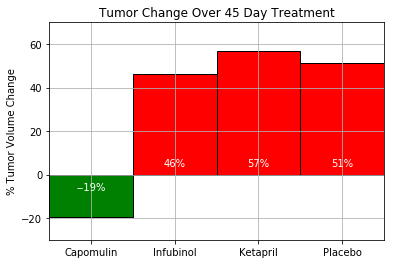

In [27]:
# Store all Relevant Percent Changes into a Tuple
percent_changes = (pct_change['Capomulin'], 
                   pct_change['Infubinol'], 
                   pct_change['Ketapril'], 
                   pct_change['Placebo'])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(percent_changes))
width = 1
rectsPass = ax.bar(ind[0], percent_changes[0], width, color = "green", ec = "black")
rectsFail = ax.bar(ind[1:], percent_changes[1:], width, color = "red", ec = "black")

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind)
ax.set_xticklabels(('Capomulin', 'Infubinol','Ketapril','Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30, 70])
ax.set_xlim([-0.5, 3.5])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3, 
                '%d%%' % int(height), 
                ha = 'center', va = 'bottom', color = 'white')
        
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%%' % int(height), 
                ha = 'center', va = 'bottom', color = 'white')
        

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
plt.savefig("Summary.png")

# Show the Figure
fig.show()